### EDA: Train Data

In [1]:
import pandas as pd
import numpy as np

# data preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# exploratory analysis
import matplotlib.pyplot as plt
import mlxtend
from mlxtend.plotting import scatterplotmatrix
from mlxtend.plotting import heatmap
import seaborn as sns
from IPython.display import Image

# model fit
import statsmodels.api as sm
import tensorflow as tf

# ignore warnings (libraries are rapidly changing)
import warnings
warnings.filterwarnings('ignore')

2023-11-15 15:00:56.364558: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-15 15:00:56.437030: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-15 15:00:56.438604: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-15 15:00:57.189732: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
train = pd.read_csv('train_data.csv')

In [3]:
train.head()

,area,region,sub-region,year,urban_population,mei,crop_residues,rice_cultivation,drained_organic_soils_co2,net_forest_conversion,...,20yr_log_drained_organic_soils_co2,20yr_log_net_forest_conversion,20yr_log_fires,20yr_log_manure_mgmt,20yr_log_food_systems,20yr_log_ippu_tot,20yr_log_on_farm_energy_use,20yr_forestland,20yr_total_emission,average_temperature_°c
0,Afghanistan,Asia,Southern Asia,1990,-0.256818,0.2,-0.213514,-0.205388,-0.248996,-0.184896,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.536167
1,Albania,Europe,Southern Europe,1990,-0.277983,0.2,-0.255139,-0.238919,-0.242540,-0.184896,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.735750
2,Algeria,Africa,Northern Africa,1990,-0.091818,0.2,-0.225268,-0.239892,-0.248996,-0.179044,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.005583
3,Angola,Africa,Sub-Saharan Africa,1990,-0.227653,0.2,-0.262785,-0.238858,-0.228766,-0.100769,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.676667
4,Argentina,Americas,Latin America and the Caribbean,1990,0.134785,0.2,0.286965,-0.193833,0.050432,0.511570,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.330083


In [4]:
feat = ['average_temperature_°c', 'year', 'urban_population', 'mei', 'total_emission']
feat_5yr = ['average_temperature_°c', '5yr_crop_residues', '5yr_rice_cultivation','5yr_manure_mgmt', '5yr_food_systems', '5yr_ippu_tot', '5yr_total_emission']
feat_10yr = ['average_temperature_°c', '10yr_crop_residues', '10yr_rice_cultivation', '10yr_manure_mgmt', '10yr_food_systems', '10yr_ippu_tot', '10yr_total_emission']
feat_20yr = ['average_temperature_°c', '20yr_crop_residues', '20yr_rice_cultivation', '20yr_manure_mgmt', '20yr_food_systems', '20yr_ippu_tot', '20yr_total_emission']

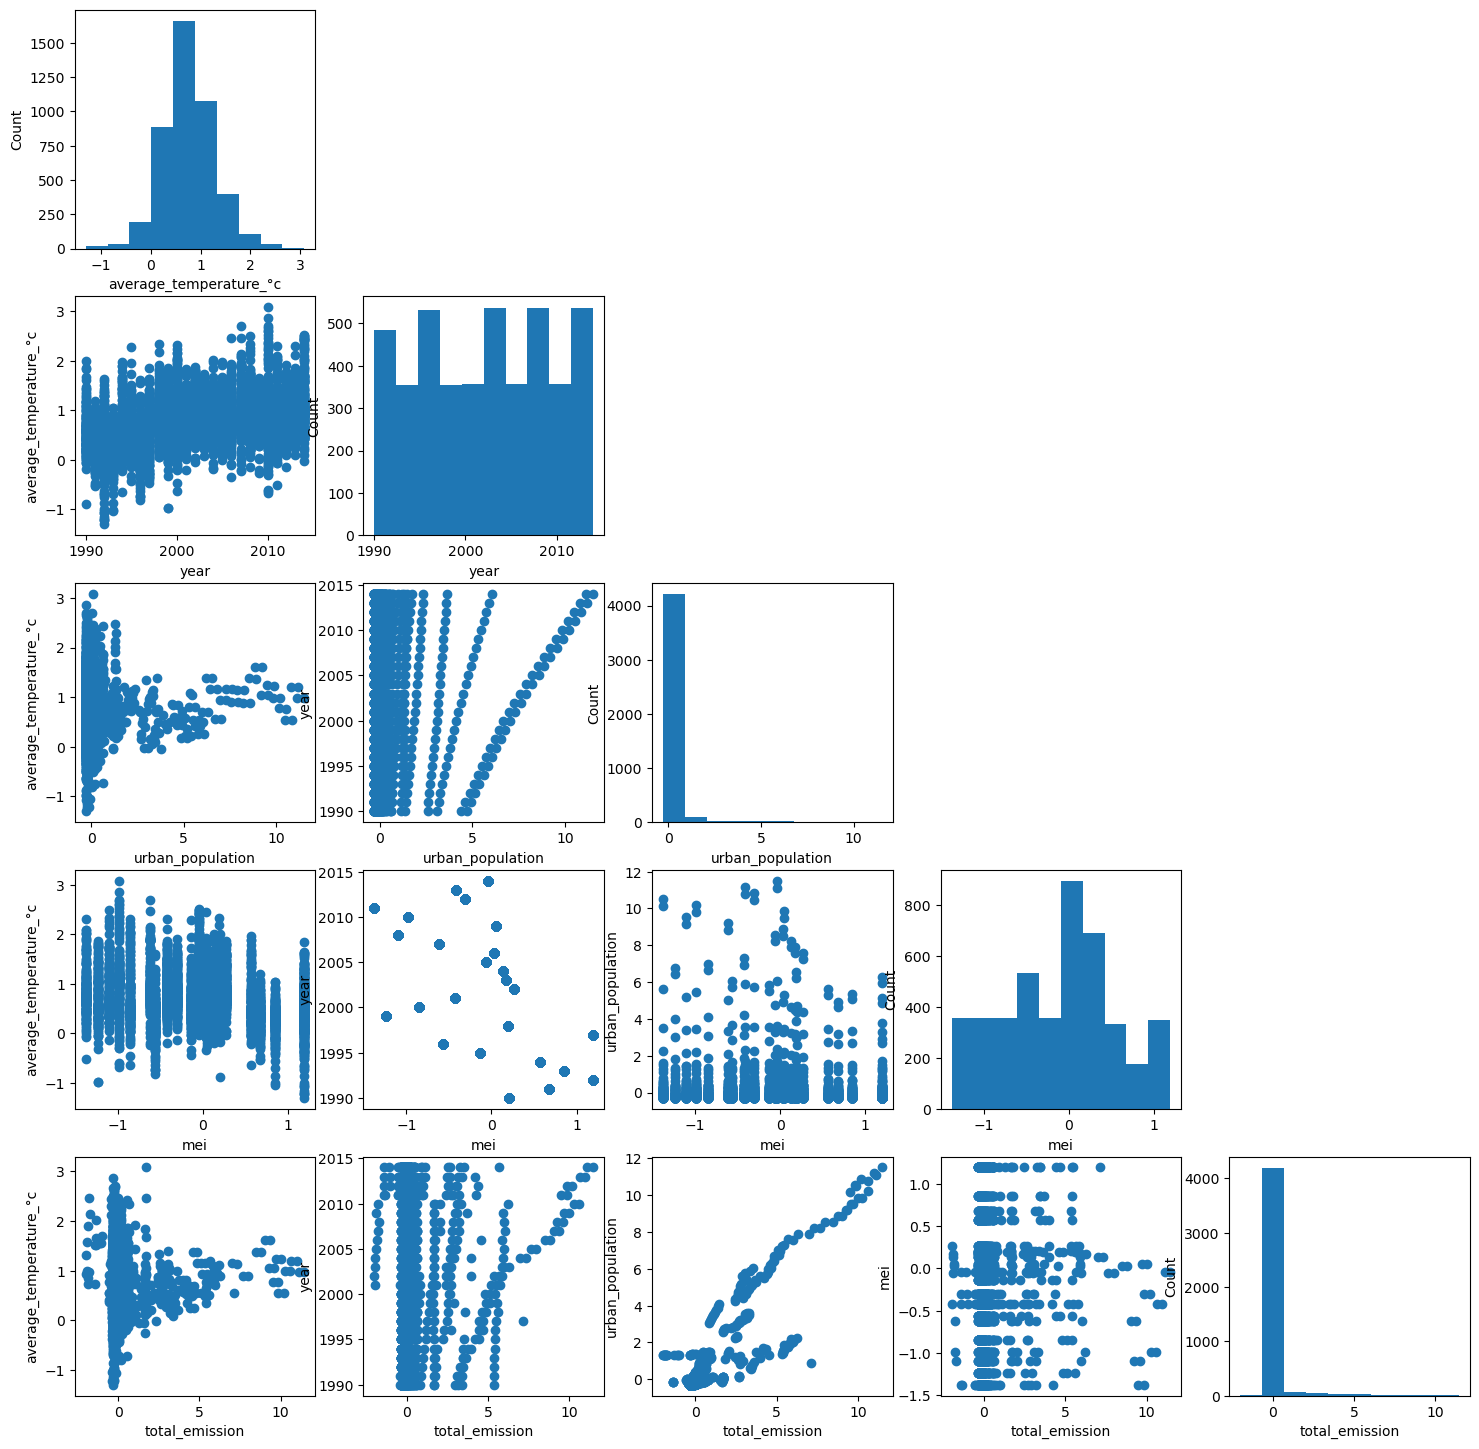

In [5]:
scatterplotmatrix(
    train[feat].values,
    names=feat,
    figsize=(18,18), alpha=1
);

In [6]:
#Print correlation matrix
cols = ['average_temperature_°c', 'area','region','sub-region','year','urban_population','mei','crop_residues','rice_cultivation',
        'drained_organic_soils_co2','net_forest_conversion','fires','manure_mgmt','food_systems','ippu_tot',
        'on_farm_energy_use','forestland','total_emission']
print(train[cols].corr())

                           average_temperature_°c      year  urban_population  \
average_temperature_°c                   1.000000  0.402033          0.027668   
year                                     0.402033  1.000000          0.048669   
urban_population                         0.027668  0.048669          1.000000   
mei                                     -0.225251 -0.544372         -0.025780   
crop_residues                            0.013348  0.024014          0.943268   
rice_cultivation                        -0.033199  0.000042          0.858750   
drained_organic_soils_co2                0.017787  0.007569          0.177505   
net_forest_conversion                   -0.028617 -0.019472          0.147701   
fires                                   -0.045755 -0.003728          0.073688   
manure_mgmt                              0.006967  0.013697          0.924927   
food_systems                             0.044310  0.045778          0.966001   
ippu_tot                    

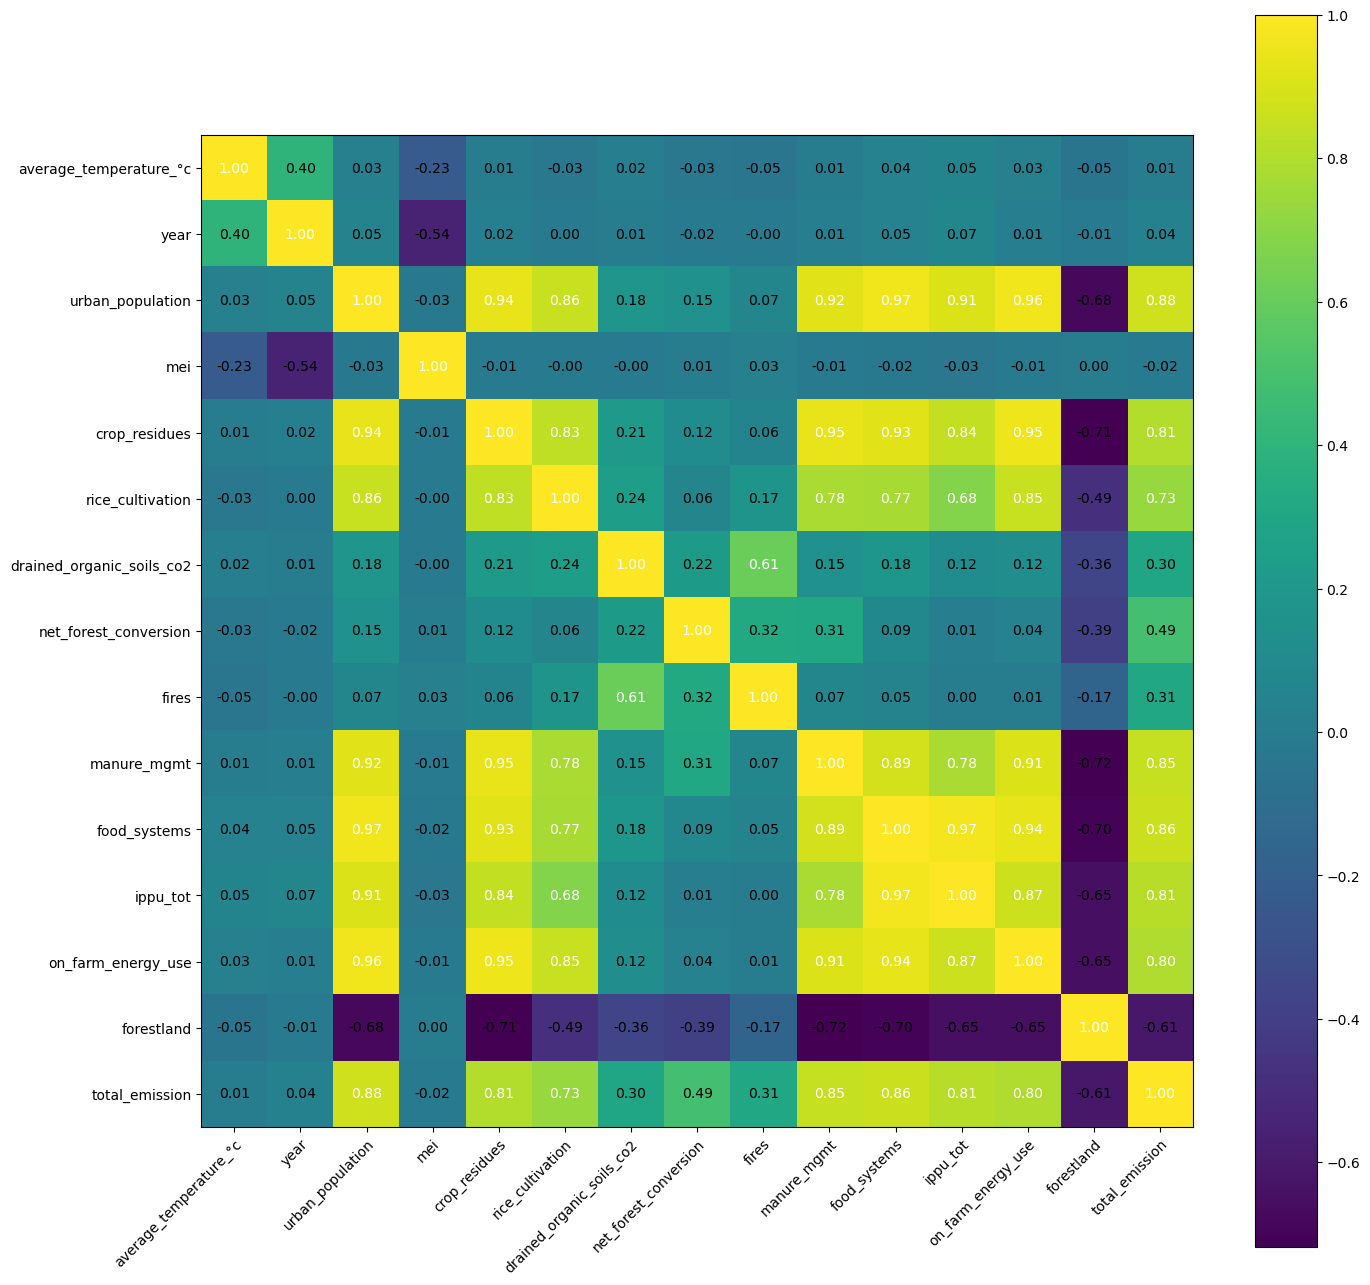

In [7]:
cols = ['average_temperature_°c','year','urban_population','mei','crop_residues','rice_cultivation',
        'drained_organic_soils_co2','net_forest_conversion','fires','manure_mgmt','food_systems','ippu_tot',
        'on_farm_energy_use','forestland','total_emission']
cm = train[cols].corr().values
hm = heatmap(
    cm,
    row_names=cols,
    column_names=cols,
    figsize=(16, 16)
)

### Compare correlation to temperature between yearly emissions and rolling average emissions

#### Log of Crop Residue

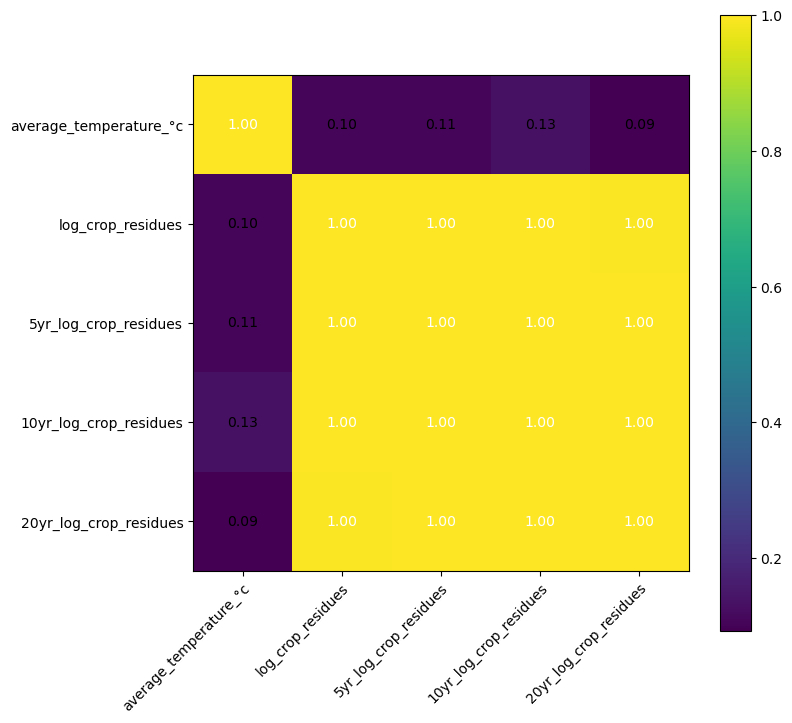

In [8]:
cols = ['average_temperature_°c','log_crop_residues','5yr_log_crop_residues', '10yr_log_crop_residues', '20yr_log_crop_residues']

cm = train[cols].corr().values
hm = heatmap(
    cm,
    row_names=cols,
    column_names=cols,
    figsize=(8, 8)
)

#### Log of Rice Cultivation

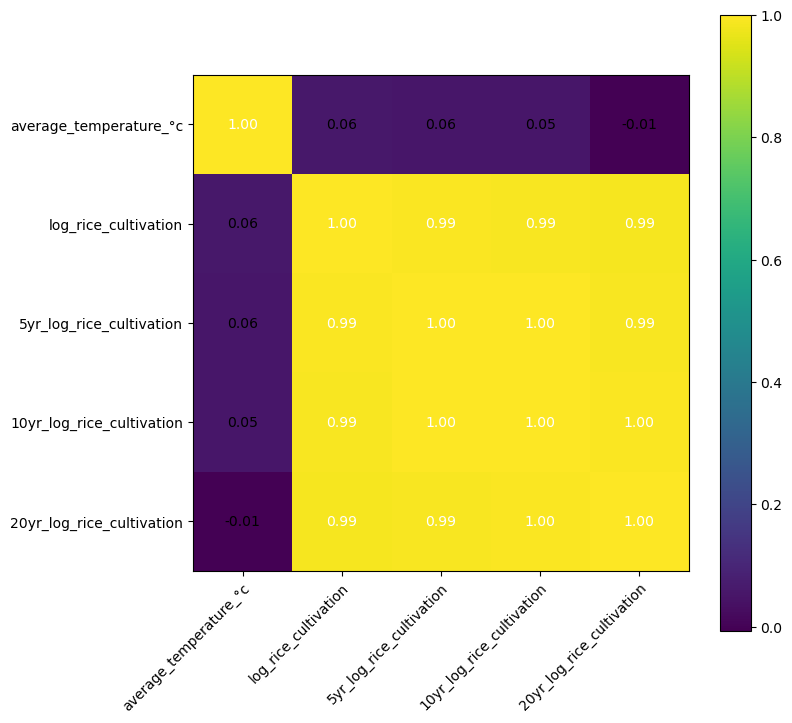

In [9]:
cols = ['average_temperature_°c','log_rice_cultivation','5yr_log_rice_cultivation', '10yr_log_rice_cultivation', '20yr_log_rice_cultivation']

cm = train[cols].corr().values
hm = heatmap(
    cm,
    row_names=cols,
    column_names=cols,
    figsize=(8, 8)
)

#### Log Drained Organic Soils

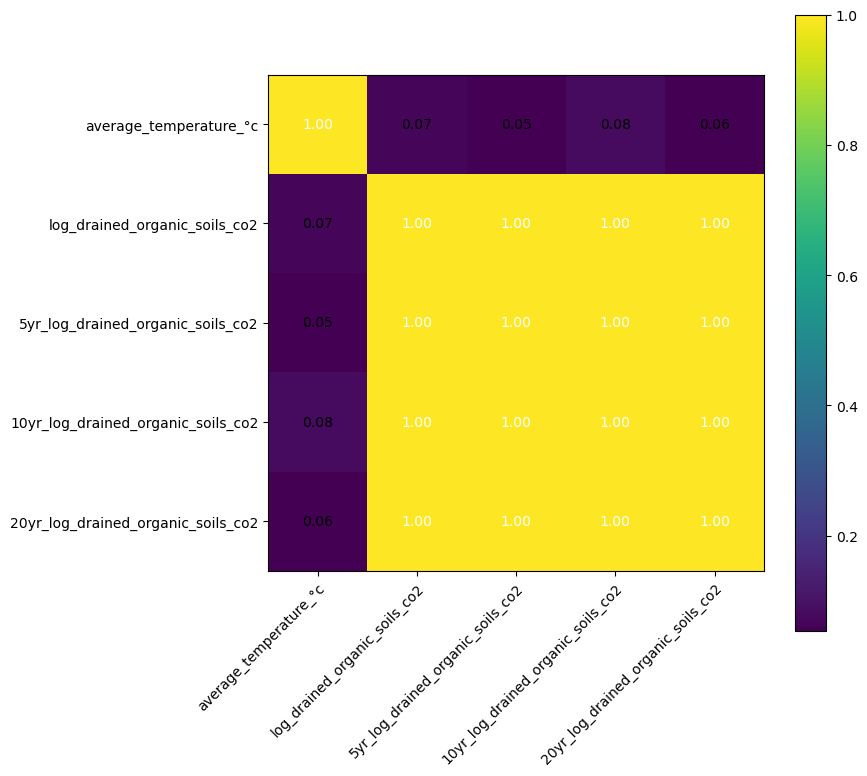

In [10]:
cols = ['average_temperature_°c','log_drained_organic_soils_co2','5yr_log_drained_organic_soils_co2', '10yr_log_drained_organic_soils_co2', '20yr_log_drained_organic_soils_co2']

cm = train[cols].corr().values
hm = heatmap(
    cm,
    row_names=cols,
    column_names=cols,
    figsize=(8, 8)
)

#### Log Net Forest Conversion

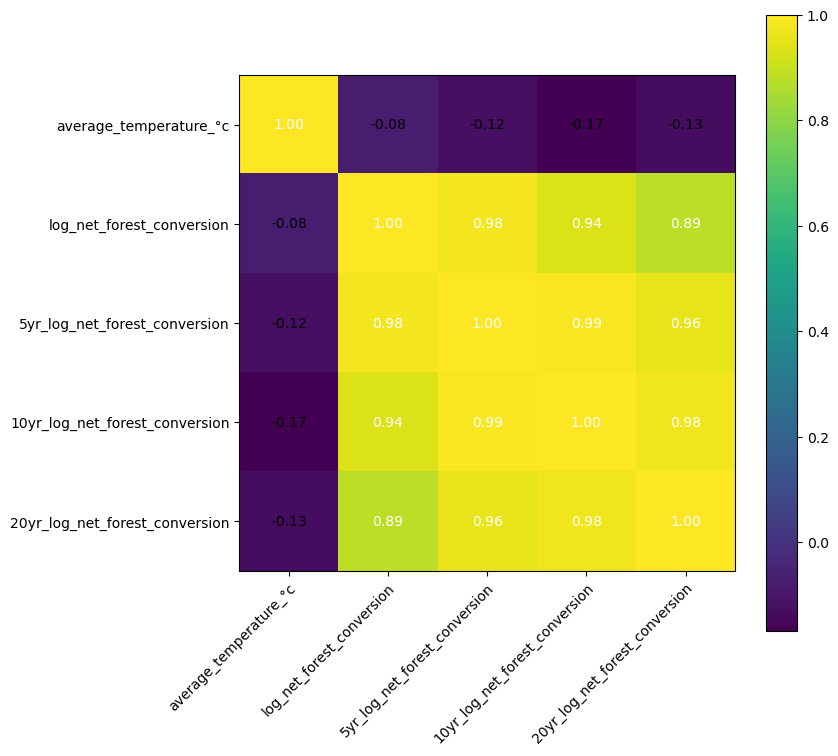

In [11]:
cols = ['average_temperature_°c','log_net_forest_conversion','5yr_log_net_forest_conversion', '10yr_log_net_forest_conversion', '20yr_log_net_forest_conversion']

cm = train[cols].corr().values
hm = heatmap(
    cm,
    row_names=cols,
    column_names=cols,
    figsize=(8, 8)
)

#### Log Fires

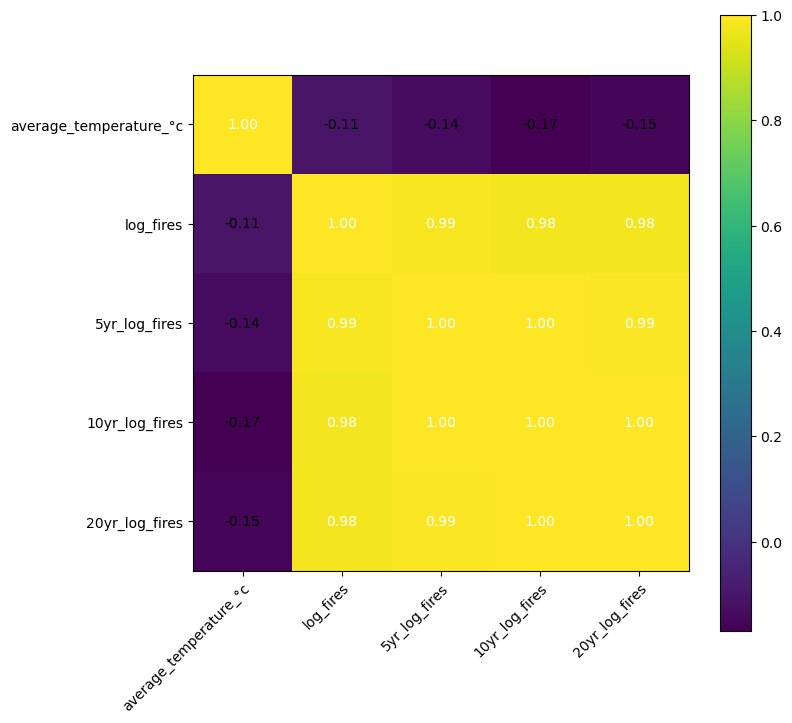

In [12]:
cols = ['average_temperature_°c','log_fires','5yr_log_fires', '10yr_log_fires', '20yr_log_fires']

cm = train[cols].corr().values
hm = heatmap(
    cm,
    row_names=cols,
    column_names=cols,
    figsize=(8, 8)
)

#### Log Manure Management

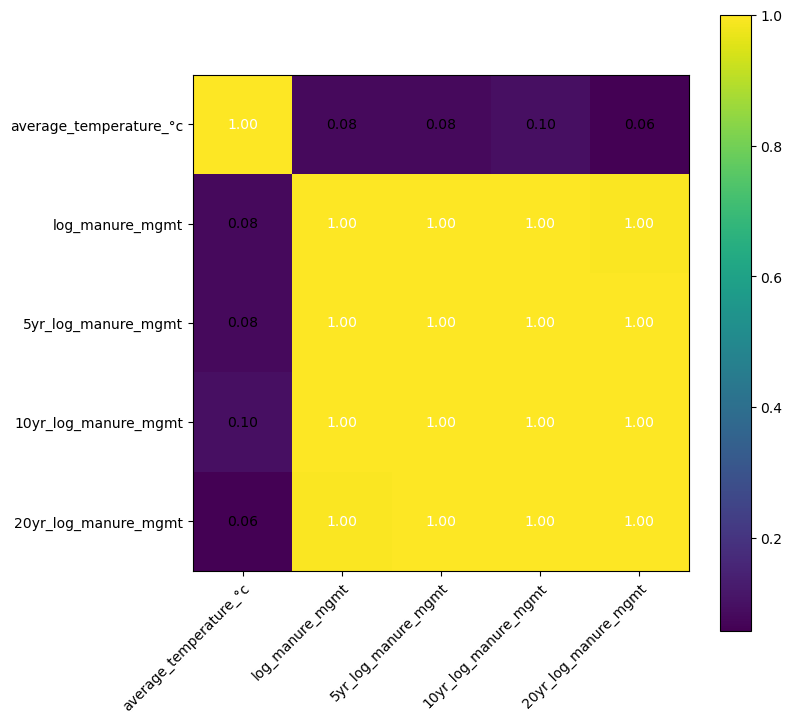

In [13]:
cols = ['average_temperature_°c','log_manure_mgmt','5yr_log_manure_mgmt', '10yr_log_manure_mgmt', '20yr_log_manure_mgmt']

cm = train[cols].corr().values
hm = heatmap(
    cm,
    row_names=cols,
    column_names=cols,
    figsize=(8, 8)
)

#### Log Food Systems

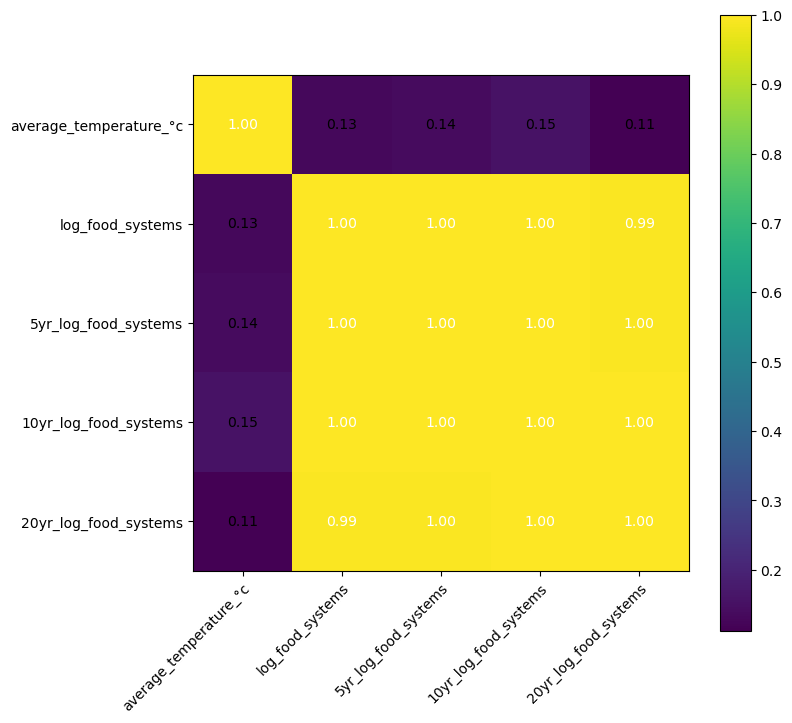

In [14]:
cols = ['average_temperature_°c','log_food_systems','5yr_log_food_systems', '10yr_log_food_systems', '20yr_log_food_systems']

cm = train[cols].corr().values
hm = heatmap(
    cm,
    row_names=cols,
    column_names=cols,
    figsize=(8, 8)
)

#### Log IPPU

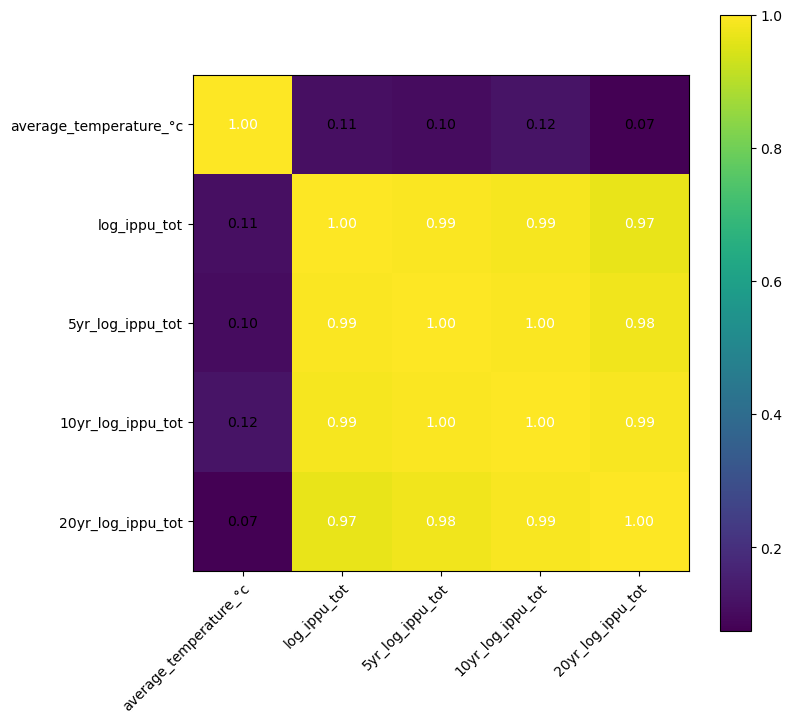

In [15]:
cols = ['average_temperature_°c','log_ippu_tot','5yr_log_ippu_tot', '10yr_log_ippu_tot', '20yr_log_ippu_tot']
cm = train[cols].corr().values
hm = heatmap(
    cm,
    row_names=cols,
    column_names=cols,
    figsize=(8, 8)
)

#### Log On Farm Energy Use

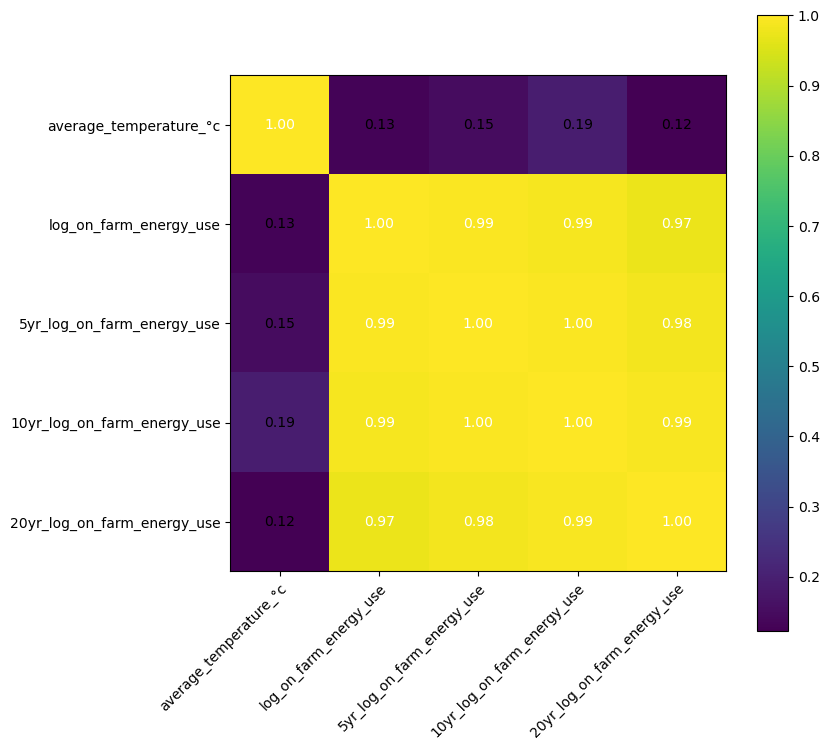

In [16]:
cols = ['average_temperature_°c','log_on_farm_energy_use','5yr_log_on_farm_energy_use', '10yr_log_on_farm_energy_use', '20yr_log_on_farm_energy_use']

cm = train[cols].corr().values
hm = heatmap(
    cm,
    row_names=cols,
    column_names=cols,
    figsize=(8, 8)
)

#### Forestland

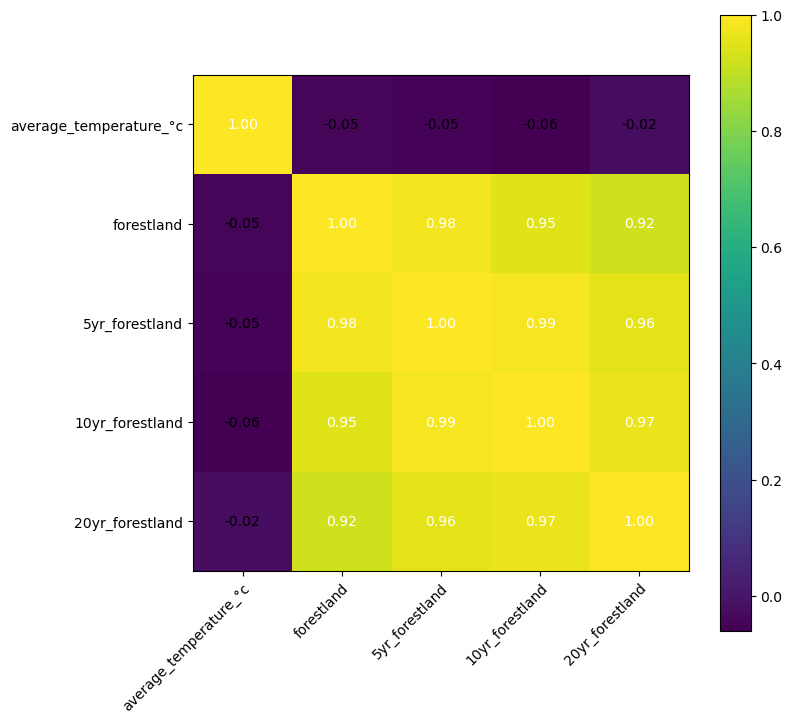

In [17]:
cols = ['average_temperature_°c','forestland','5yr_forestland', '10yr_forestland', '20yr_forestland']

cm = train[cols].corr().values
hm = heatmap(
    cm,
    row_names=cols,
    column_names=cols,
    figsize=(8, 8)
)

#### Total Emissions

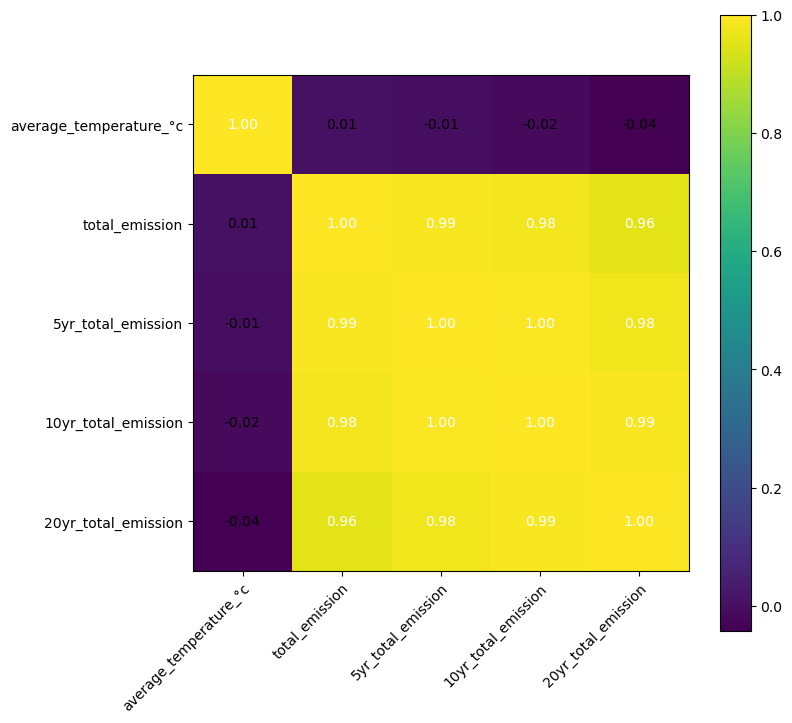

In [18]:
cols = ['average_temperature_°c','total_emission','5yr_total_emission', '10yr_total_emission', '20yr_total_emission']

cm = train[cols].corr().values
hm = heatmap(
    cm,
    row_names=cols,
    column_names=cols,
    figsize=(8, 8)
)

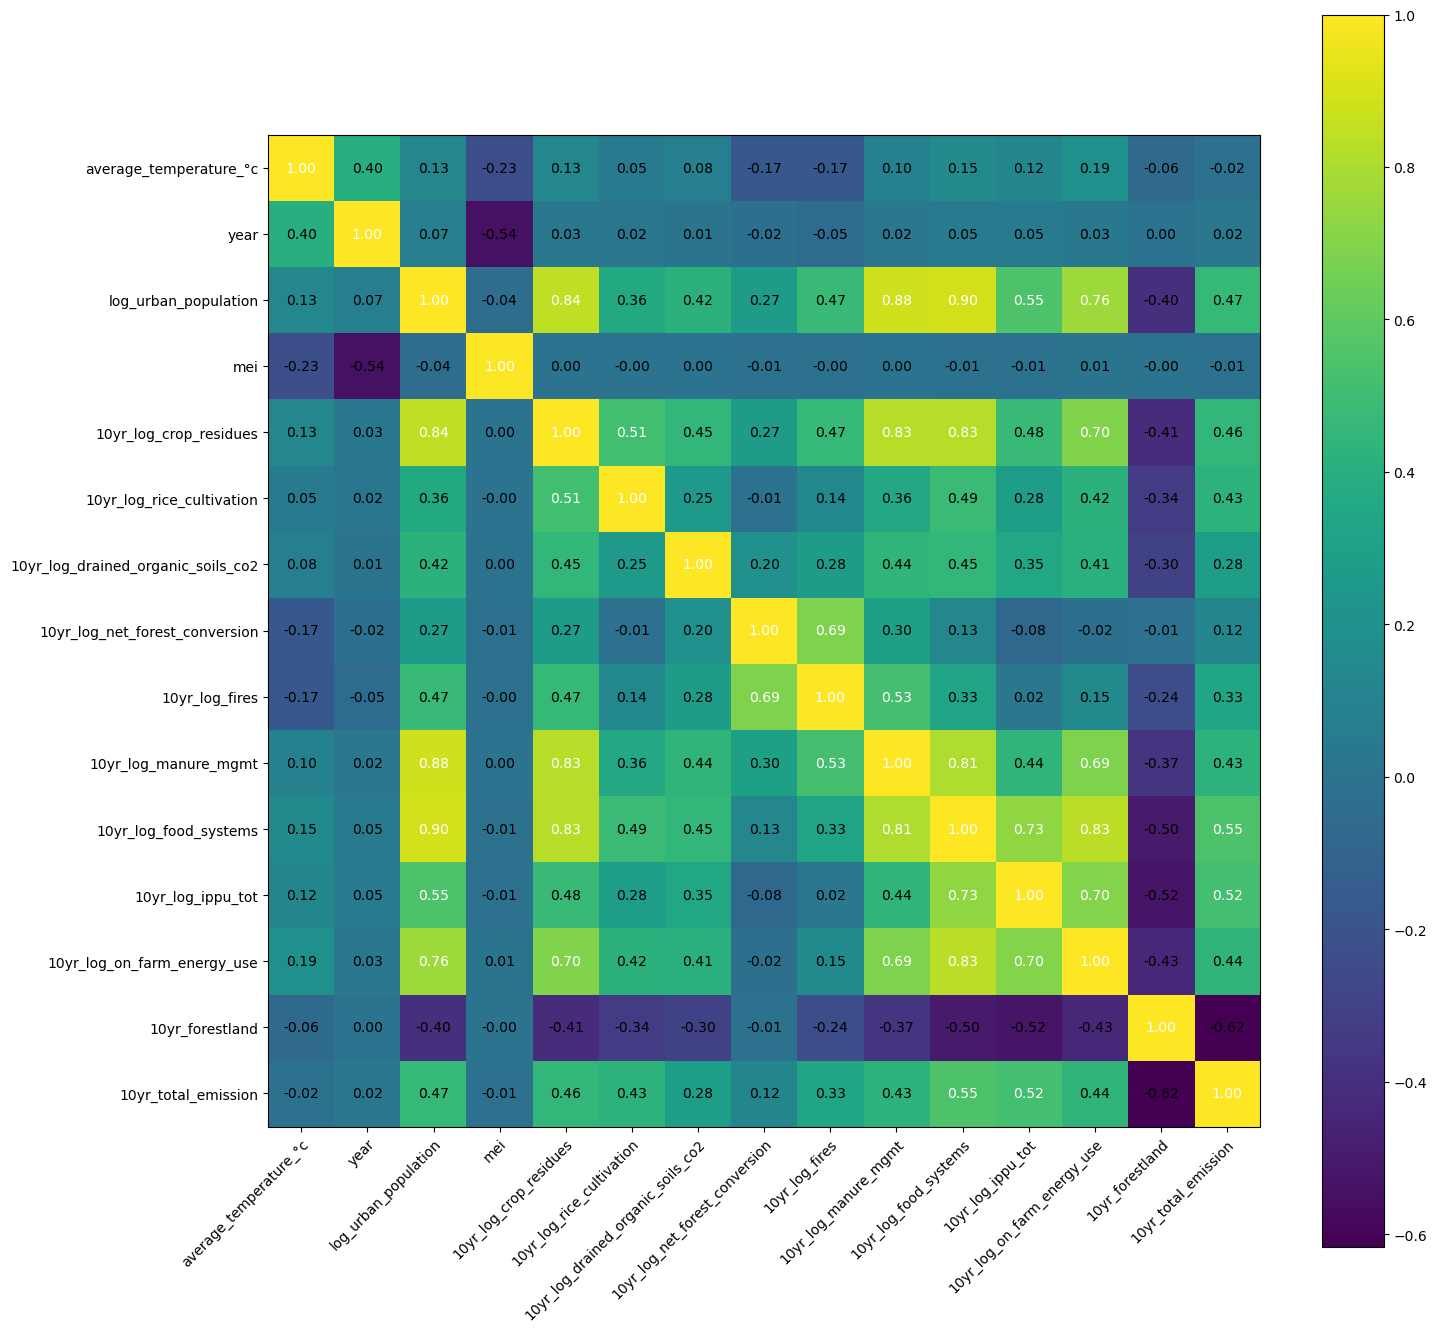

In [19]:
cols = ['average_temperature_°c','year','log_urban_population','mei','10yr_log_crop_residues','10yr_log_rice_cultivation',
        '10yr_log_drained_organic_soils_co2','10yr_log_net_forest_conversion','10yr_log_fires','10yr_log_manure_mgmt','10yr_log_food_systems','10yr_log_ippu_tot',
        '10yr_log_on_farm_energy_use','10yr_forestland','10yr_total_emission']
cm = train[cols].corr().values
hm = heatmap(
    cm,
    row_names=cols,
    column_names=cols,
    figsize=(16, 16)
)

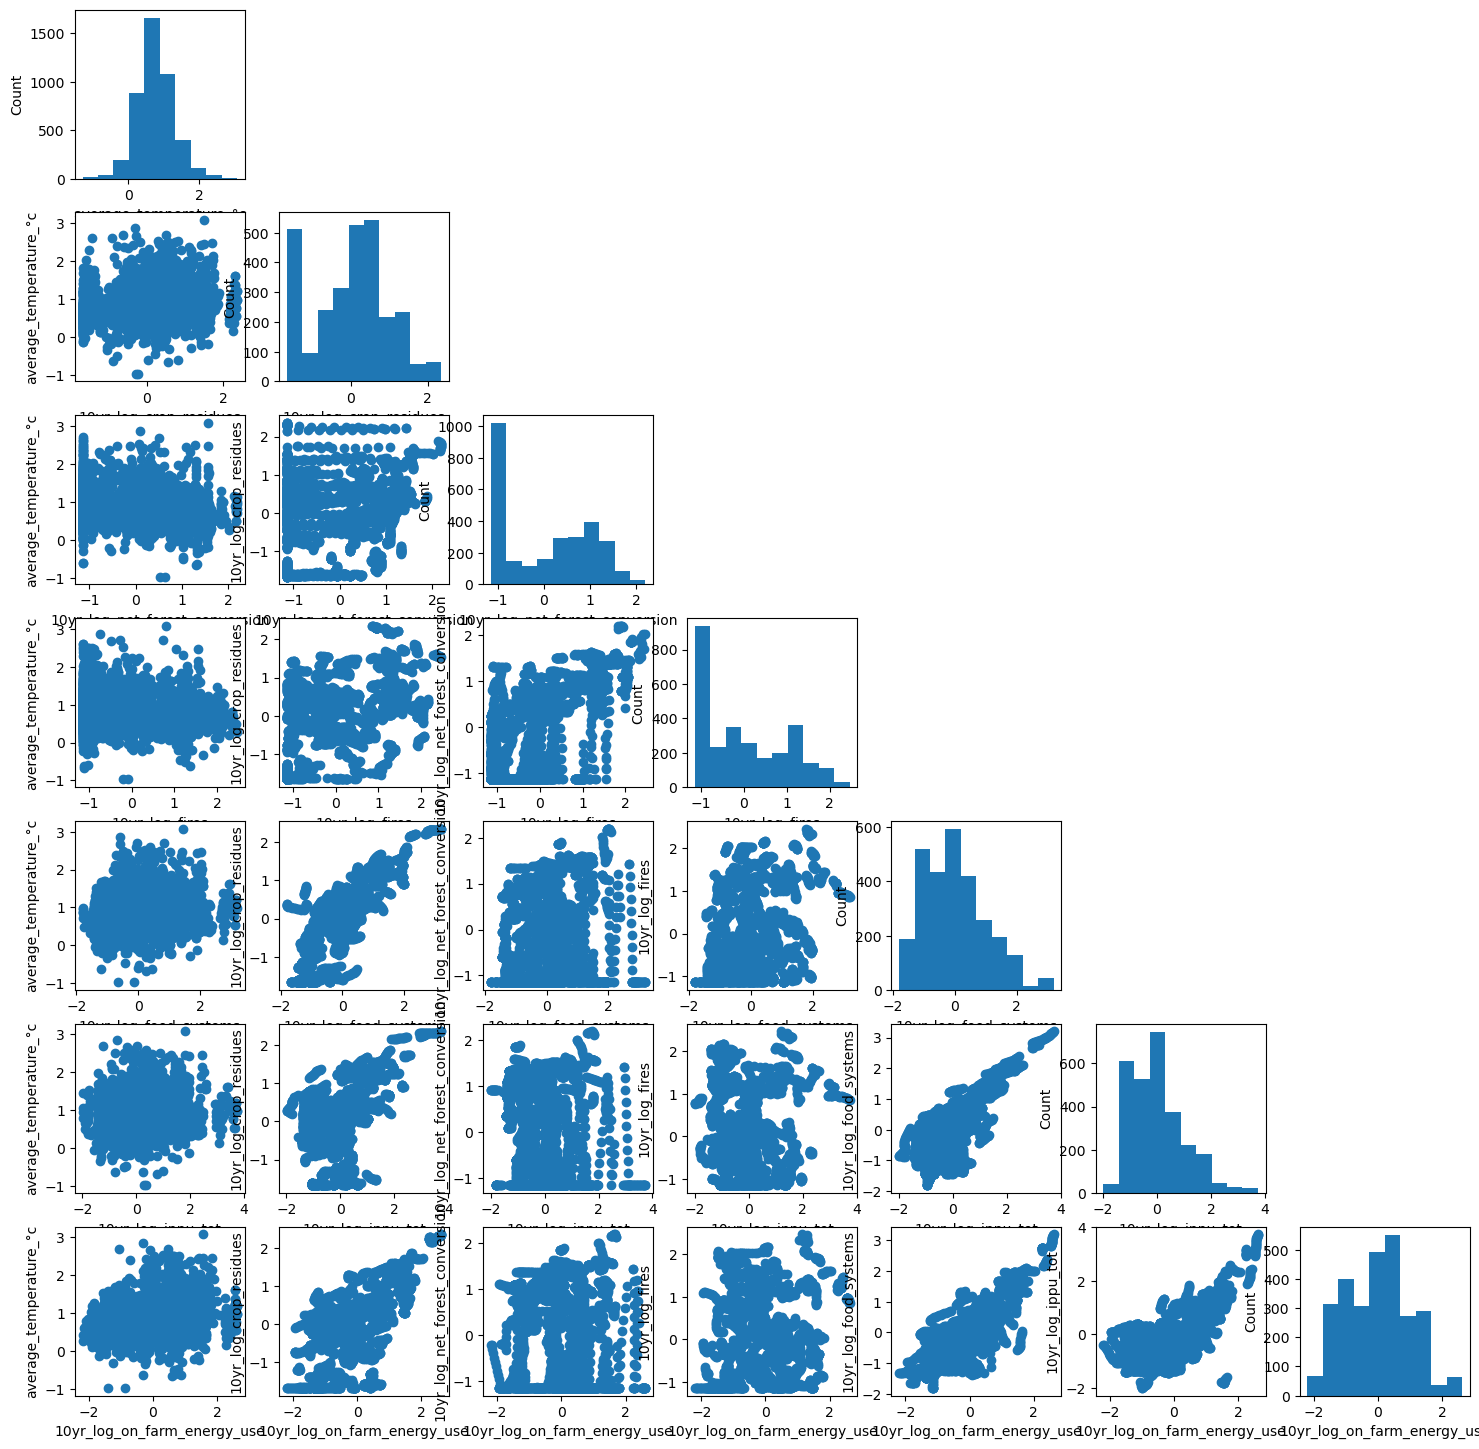

In [23]:
feat = ['average_temperature_°c','10yr_log_crop_residues','10yr_log_net_forest_conversion','10yr_log_fires','10yr_log_food_systems','10yr_log_ippu_tot','10yr_log_on_farm_energy_use']

scatterplotmatrix(
    train[feat].values,
    names=feat,
    figsize=(18,18), alpha=1
);